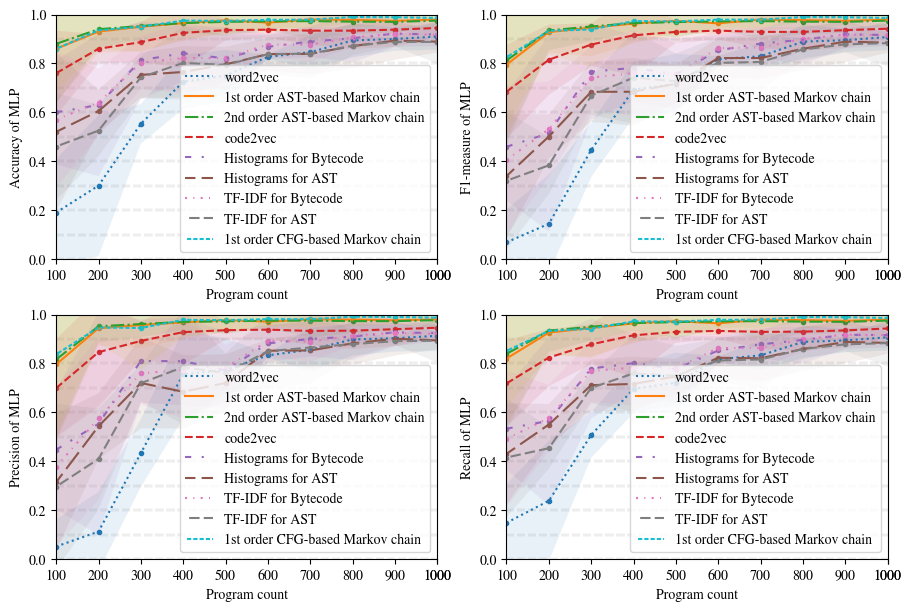

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc

import math
import time
import numpy as np

# The generated data was borrowed from '*.ipynb' files.
EXPORT_SVG = False
rc('font', **dict(family='STIXGeneral'))

WORD2VEC_MLP = {
    'name': 'word2vec',
    'statistics': [
        {'accuracy': (0.19, 0.073), 'f1_macro': (0.068, 0.045), 'fit_time': (0.155, 0.056), 'precision_macro': (0.051, 0.037), 'recall_macro': (0.148, 0.053), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.3, 0.096), 'f1_macro': (0.144, 0.067), 'fit_time': (0.16, 0.069), 'precision_macro': (0.112, 0.054), 'recall_macro': (0.238, 0.082), 'score_time': (0.007, 0.002)},
        {'accuracy': (0.553, 0.027), 'f1_macro': (0.446, 0.037), 'fit_time': (0.357, 0.001), 'precision_macro': (0.433, 0.046), 'recall_macro': (0.507, 0.031), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.725, 0.037), 'f1_macro': (0.693, 0.038), 'fit_time': (0.383, 0.001), 'precision_macro': (0.756, 0.06), 'recall_macro': (0.696, 0.033), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.75, 0.035), 'f1_macro': (0.716, 0.041), 'fit_time': (0.405, 0.004), 'precision_macro': (0.773, 0.043), 'recall_macro': (0.721, 0.041), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.827, 0.003), 'f1_macro': (0.818, 0.004), 'fit_time': (0.568, 0.002), 'precision_macro': (0.833, 0.003), 'recall_macro': (0.817, 0.004), 'score_time': (0.006, 0.0)},
        {'accuracy': (0.846, 0.023), 'f1_macro': (0.829, 0.018), 'fit_time': (0.605, 0.01), 'precision_macro': (0.856, 0.03), 'recall_macro': (0.833, 0.02), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.894, 0.023), 'f1_macro': (0.889, 0.023), 'fit_time': (0.787, 0.032), 'precision_macro': (0.898, 0.022), 'recall_macro': (0.888, 0.022), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.9, 0.016), 'f1_macro': (0.895, 0.016), 'fit_time': (0.785, 0.003), 'precision_macro': (0.903, 0.018), 'recall_macro': (0.894, 0.016), 'score_time': (0.008, 0.0)},
        {'accuracy': (0.91, 0.018), 'f1_macro': (0.908, 0.018), 'fit_time': (0.823, 0.016), 'precision_macro': (0.913, 0.021), 'recall_macro': (0.907, 0.018), 'score_time': (0.007, 0.0)}
    ]
}

CODE2VEC_MLP = {
    'name': 'code2vec',
    'statistics': [
        {'accuracy': (0.76, 0.058), 'f1_macro': (0.684, 0.064), 'fit_time': (0.252, 0.042), 'precision_macro': (0.699, 0.067), 'recall_macro': (0.718, 0.059), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.86, 0.02), 'f1_macro': (0.815, 0.048), 'fit_time': (0.268, 0.007), 'precision_macro': (0.846, 0.074), 'recall_macro': (0.824, 0.039), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.887, 0.027), 'f1_macro': (0.877, 0.029), 'fit_time': (0.53, 0.055), 'precision_macro': (0.892, 0.026), 'recall_macro': (0.878, 0.027), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.925, 0.048), 'f1_macro': (0.915, 0.055), 'fit_time': (0.533, 0.01), 'precision_macro': (0.928, 0.044), 'recall_macro': (0.915, 0.057), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.936, 0.014), 'f1_macro': (0.929, 0.015), 'fit_time': (0.552, 0.006), 'precision_macro': (0.936, 0.013), 'recall_macro': (0.929, 0.015), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.938, 0.011), 'f1_macro': (0.934, 0.012), 'fit_time': (0.812, 0.018), 'precision_macro': (0.938, 0.013), 'recall_macro': (0.933, 0.011), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.934, 0.019), 'f1_macro': (0.929, 0.022), 'fit_time': (0.832, 0.015), 'precision_macro': (0.933, 0.019), 'recall_macro': (0.929, 0.023), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.934, 0.025), 'f1_macro': (0.929, 0.026), 'fit_time': (1.118, 0.022), 'precision_macro': (0.934, 0.025), 'recall_macro': (0.93, 0.026), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.938, 0.023), 'f1_macro': (0.936, 0.024), 'fit_time': (1.135, 0.019), 'precision_macro': (0.94, 0.023), 'recall_macro': (0.935, 0.023), 'score_time': (0.009, 0.002)},
        {'accuracy': (0.945, 0.012), 'f1_macro': (0.942, 0.013), 'fit_time': (1.18, 0.034), 'precision_macro': (0.946, 0.013), 'recall_macro': (0.943, 0.013), 'score_time': (0.009, 0.002)}
    ]
}

MCHAIN1_MLP = {
    'name': '1st order AST-based Markov chain',
    'statistics': [
        {'accuracy': (0.86, 0.073), 'f1_macro': (0.795, 0.1), 'fit_time': (2.236, 0.047), 'precision_macro': (0.796, 0.105), 'recall_macro': (0.82, 0.091), 'score_time': (0.009, 0.001)},
        {'accuracy': (0.93, 0.029), 'f1_macro': (0.928, 0.028), 'fit_time': (3.179, 0.046), 'precision_macro': (0.944, 0.024), 'recall_macro': (0.926, 0.03), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.95, 0.033), 'f1_macro': (0.946, 0.039), 'fit_time': (5.74, 0.071), 'precision_macro': (0.957, 0.031), 'recall_macro': (0.945, 0.039), 'score_time': (0.009, 0.003)},
        {'accuracy': (0.965, 0.024), 'f1_macro': (0.963, 0.027), 'fit_time': (5.89, 0.011), 'precision_macro': (0.968, 0.023), 'recall_macro': (0.964, 0.027), 'score_time': (0.009, 0.001)},
        {'accuracy': (0.976, 0.016), 'f1_macro': (0.974, 0.017), 'fit_time': (6.148, 0.035), 'precision_macro': (0.977, 0.016), 'recall_macro': (0.973, 0.017), 'score_time': (0.009, 0.001)},
        {'accuracy': (0.967, 0.014), 'f1_macro': (0.964, 0.015), 'fit_time': (9.489, 0.037), 'precision_macro': (0.971, 0.011), 'recall_macro': (0.964, 0.016), 'score_time': (0.01, 0.002)},
        {'accuracy': (0.979, 0.015), 'f1_macro': (0.979, 0.015), 'fit_time': (9.396, 0.022), 'precision_macro': (0.98, 0.014), 'recall_macro': (0.979, 0.015), 'score_time': (0.009, 0.0)},
        {'accuracy': (0.978, 0.01), 'f1_macro': (0.977, 0.011), 'fit_time': (13.734, 0.029), 'precision_macro': (0.979, 0.009), 'recall_macro': (0.977, 0.011), 'score_time': (0.01, 0.001)},
        {'accuracy': (0.974, 0.007), 'f1_macro': (0.974, 0.006), 'fit_time': (13.983, 0.027), 'precision_macro': (0.976, 0.006), 'recall_macro': (0.974, 0.007), 'score_time': (0.01, 0.0)},
        {'accuracy': (0.979, 0.012), 'f1_macro': (0.979, 0.012), 'fit_time': (13.994, 0.029), 'precision_macro': (0.98, 0.012), 'recall_macro': (0.979, 0.012), 'score_time': (0.009, 0.001)}
    ]
}

MCHAIN2_MLP = {
    'name': '2nd order AST-based Markov chain',
    'statistics': [
        {'accuracy': (0.88, 0.081), 'f1_macro': (0.812, 0.114), 'fit_time': (22.309, 0.684), 'precision_macro': (0.816, 0.108), 'recall_macro': (0.839, 0.104), 'score_time': (0.014, 0.007)},
        {'accuracy': (0.94, 0.025), 'f1_macro': (0.935, 0.027), 'fit_time': (38.089, 0.878), 'precision_macro': (0.952, 0.022), 'recall_macro': (0.934, 0.029), 'score_time': (0.02, 0.004)},
        {'accuracy': (0.953, 0.019), 'f1_macro': (0.951, 0.02), 'fit_time': (76.915, 1.703), 'precision_macro': (0.961, 0.018), 'recall_macro': (0.95, 0.019), 'score_time': (0.021, 0.002)},
        {'accuracy': (0.965, 0.012), 'f1_macro': (0.965, 0.012), 'fit_time': (85.439, 0.74), 'precision_macro': (0.97, 0.011), 'recall_macro': (0.965, 0.01), 'score_time': (0.028, 0.004)},
        {'accuracy': (0.97, 0.019), 'f1_macro': (0.969, 0.021), 'fit_time': (98.002, 0.444), 'precision_macro': (0.972, 0.017), 'recall_macro': (0.969, 0.022), 'score_time': (0.03, 0.001)},
        {'accuracy': (0.972, 0.012), 'f1_macro': (0.972, 0.012), 'fit_time': (159.68, 5.556), 'precision_macro': (0.975, 0.01), 'recall_macro': (0.972, 0.012), 'score_time': (0.035, 0.002)},
        {'accuracy': (0.973, 0.024), 'f1_macro': (0.973, 0.024), 'fit_time': (156.992, 3.954), 'precision_macro': (0.975, 0.023), 'recall_macro': (0.973, 0.024), 'score_time': (0.037, 0.001)},
        {'accuracy': (0.971, 0.017), 'f1_macro': (0.971, 0.017), 'fit_time': (211.999, 9.419), 'precision_macro': (0.973, 0.016), 'recall_macro': (0.971, 0.017), 'score_time': (0.041, 0.001)},
        {'accuracy': (0.97, 0.015), 'f1_macro': (0.97, 0.015), 'fit_time': (196.602, 3.172), 'precision_macro': (0.973, 0.014), 'recall_macro': (0.97, 0.015), 'score_time': (0.048, 0.002)},
        {'accuracy': (0.975, 0.008), 'f1_macro': (0.975, 0.007), 'fit_time': (196.758, 6.386), 'precision_macro': (0.977, 0.008), 'recall_macro': (0.975, 0.007), 'score_time': (0.047, 0.003)}
    ]
}

MCHAINB_MLP = {
    'name': '1st order CFG-based Markov chain',
    'statistics': [
        {'accuracy': (0.86, 0.058), 'f1_macro': (0.825, 0.095), 'fit_time': (1.033, 0.015), 'precision_macro': (0.837, 0.105), 'recall_macro': (0.851, 0.078), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.935, 0.025), 'f1_macro': (0.933, 0.032), 'fit_time': (1.584, 0.011), 'precision_macro': (0.947, 0.022), 'recall_macro': (0.933, 0.033), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.95, 0.035), 'f1_macro': (0.939, 0.051), 'fit_time': (2.927, 0.031), 'precision_macro': (0.945, 0.057), 'recall_macro': (0.942, 0.04), 'score_time': (0.005, 0.0)},
        {'accuracy': (0.975, 0.025), 'f1_macro': (0.973, 0.027), 'fit_time': (3.196, 0.103), 'precision_macro': (0.978, 0.023), 'recall_macro': (0.972, 0.027), 'score_time': (0.005, 0.0)},
        {'accuracy': (0.974, 0.019), 'f1_macro': (0.972, 0.021), 'fit_time': (3.727, 0.092), 'precision_macro': (0.977, 0.016), 'recall_macro': (0.971, 0.023), 'score_time': (0.006, 0.0)},
        {'accuracy': (0.978, 0.011), 'f1_macro': (0.979, 0.011), 'fit_time': (4.611, 0.112), 'precision_macro': (0.981, 0.01), 'recall_macro': (0.978, 0.011), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.979, 0.012), 'f1_macro': (0.979, 0.011), 'fit_time': (4.724, 0.139), 'precision_macro': (0.981, 0.011), 'recall_macro': (0.979, 0.011), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.99, 0.008), 'f1_macro': (0.99, 0.007), 'fit_time': (5.928, 0.177), 'precision_macro': (0.991, 0.007), 'recall_macro': (0.99, 0.007), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.989, 0.005), 'f1_macro': (0.989, 0.005), 'fit_time': (5.81, 0.246), 'precision_macro': (0.99, 0.005), 'recall_macro': (0.989, 0.005), 'score_time': (0.008, 0.0)},
        {'accuracy': (0.986, 0.005), 'f1_macro': (0.986, 0.005), 'fit_time': (5.85, 0.258), 'precision_macro': (0.987, 0.005), 'recall_macro': (0.986, 0.005), 'score_time': (0.008, 0.001)}
    ]
}

BYTECODE_MLP = {
    'name': 'Histograms for Bytecode',
    'statistics': [
        {'accuracy': (0.6, 0.071), 'f1_macro': (0.459, 0.073), 'fit_time': (0.19, 0.047), 'precision_macro': (0.447, 0.081), 'recall_macro': (0.533, 0.056), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.63, 0.097), 'f1_macro': (0.514, 0.134), 'fit_time': (0.194, 0.003), 'precision_macro': (0.553, 0.152), 'recall_macro': (0.565, 0.115), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.813, 0.053), 'f1_macro': (0.766, 0.065), 'fit_time': (0.358, 0.007), 'precision_macro': (0.81, 0.057), 'recall_macro': (0.779, 0.068), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.842, 0.038), 'f1_macro': (0.782, 0.045), 'fit_time': (0.39, 0.013), 'precision_macro': (0.809, 0.06), 'recall_macro': (0.801, 0.04), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.82, 0.043), 'f1_macro': (0.755, 0.049), 'fit_time': (0.398, 0.007), 'precision_macro': (0.772, 0.053), 'recall_macro': (0.777, 0.046), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.868, 0.017), 'f1_macro': (0.854, 0.021), 'fit_time': (0.566, 0.017), 'precision_macro': (0.882, 0.025), 'recall_macro': (0.853, 0.02), 'score_time': (0.007, 0.0)},
        {'accuracy': (0.889, 0.021), 'f1_macro': (0.881, 0.02), 'fit_time': (0.606, 0.014), 'precision_macro': (0.9, 0.024), 'recall_macro': (0.878, 0.019), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.903, 0.033), 'f1_macro': (0.897, 0.033), 'fit_time': (0.762, 0.013), 'precision_macro': (0.91, 0.032), 'recall_macro': (0.896, 0.032), 'score_time': (0.007, 0.001)},
        {'accuracy': (0.922, 0.018), 'f1_macro': (0.919, 0.019), 'fit_time': (0.782, 0.01), 'precision_macro': (0.927, 0.019), 'recall_macro': (0.917, 0.019), 'score_time': (0.008, 0.001)},
        {'accuracy': (0.918, 0.016), 'f1_macro': (0.916, 0.015), 'fit_time': (0.819, 0.007), 'precision_macro': (0.924, 0.011), 'recall_macro': (0.916, 0.017), 'score_time': (0.007, 0.0)}
    ]
}

ASTHISTS_MLP = {
    'name': 'Histograms for AST',
    'statistics': [
        {'accuracy': (0.52, 0.108), 'f1_macro': (0.339, 0.085), 'fit_time': (0.208, 0.08), 'precision_macro': (0.314, 0.093), 'recall_macro': (0.43, 0.069), 'score_time': (0.004, 0.005)},
        {'accuracy': (0.605, 0.029), 'f1_macro': (0.501, 0.03), 'fit_time': (0.187, 0.006), 'precision_macro': (0.543, 0.045), 'recall_macro': (0.55, 0.028), 'score_time': (0.007, 0.008)},
        {'accuracy': (0.753, 0.031), 'f1_macro': (0.684, 0.041), 'fit_time': (0.347, 0.007), 'precision_macro': (0.72, 0.062), 'recall_macro': (0.711, 0.035), 'score_time': (0.006, 0.007)},
        {'accuracy': (0.765, 0.035), 'f1_macro': (0.684, 0.046), 'fit_time': (0.373, 0.008), 'precision_macro': (0.684, 0.05), 'recall_macro': (0.716, 0.037), 'score_time': (0.003, 0.007)},
        {'accuracy': (0.796, 0.024), 'f1_macro': (0.717, 0.026), 'fit_time': (0.401, 0.01), 'precision_macro': (0.72, 0.039), 'recall_macro': (0.747, 0.024), 'score_time': (0.006, 0.007)},
        {'accuracy': (0.838, 0.022), 'f1_macro': (0.822, 0.027), 'fit_time': (0.559, 0.01), 'precision_macro': (0.852, 0.016), 'recall_macro': (0.823, 0.028), 'score_time': (0.006, 0.006)},
        {'accuracy': (0.839, 0.028), 'f1_macro': (0.822, 0.028), 'fit_time': (0.582, 0.013), 'precision_macro': (0.853, 0.024), 'recall_macro': (0.821, 0.031), 'score_time': (0.006, 0.008)},
        {'accuracy': (0.871, 0.03), 'f1_macro': (0.86, 0.029), 'fit_time': (0.899, 0.14), 'precision_macro': (0.882, 0.029), 'recall_macro': (0.859, 0.03), 'score_time': (0.01, 0.006)},
        {'accuracy': (0.893, 0.026), 'f1_macro': (0.889, 0.028), 'fit_time': (0.772, 0.015), 'precision_macro': (0.901, 0.023), 'recall_macro': (0.888, 0.029), 'score_time': (0.008, 0.007)},
        {'accuracy': (0.889, 0.015), 'f1_macro': (0.885, 0.014), 'fit_time': (0.856, 0.123), 'precision_macro': (0.894, 0.012), 'recall_macro': (0.884, 0.015), 'score_time': (0.008, 0.007)}
    ]
}

BYTECODE_TFIDF_MLP = {
    'name': 'TF-IDF for Bytecode',
    'statistics': [
        {'accuracy': (0.57, 0.093), 'f1_macro': (0.405, 0.102), 'fit_time': (0.051, 0.001), 'precision_macro': (0.377, 0.108), 'recall_macro': (0.491, 0.093), 'score_time': (0.002, 0.0)},
        {'accuracy': (0.64, 0.046), 'f1_macro': (0.531, 0.065), 'fit_time': (0.119, 0.013), 'precision_macro': (0.575, 0.111), 'recall_macro': (0.577, 0.045), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.803, 0.036), 'f1_macro': (0.742, 0.042), 'fit_time': (0.187, 0.022), 'precision_macro': (0.759, 0.042), 'recall_macro': (0.769, 0.042), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.822, 0.048), 'f1_macro': (0.76, 0.059), 'fit_time': (0.35, 0.135), 'precision_macro': (0.774, 0.067), 'recall_macro': (0.783, 0.052), 'score_time': (0.005, 0.002)},
        {'accuracy': (0.822, 0.039), 'f1_macro': (0.757, 0.042), 'fit_time': (0.28, 0.099), 'precision_macro': (0.782, 0.032), 'recall_macro': (0.78, 0.043), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.877, 0.016), 'f1_macro': (0.863, 0.025), 'fit_time': (0.514, 0.156), 'precision_macro': (0.892, 0.021), 'recall_macro': (0.863, 0.021), 'score_time': (0.01, 0.011)},
        {'accuracy': (0.877, 0.024), 'f1_macro': (0.865, 0.028), 'fit_time': (0.464, 0.095), 'precision_macro': (0.889, 0.028), 'recall_macro': (0.863, 0.027), 'score_time': (0.005, 0.001)},
        {'accuracy': (0.906, 0.013), 'f1_macro': (0.9, 0.016), 'fit_time': (0.725, 0.25), 'precision_macro': (0.914, 0.013), 'recall_macro': (0.899, 0.017), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.921, 0.01), 'f1_macro': (0.918, 0.011), 'fit_time': (0.501, 0.072), 'precision_macro': (0.925, 0.012), 'recall_macro': (0.918, 0.011), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.917, 0.011), 'f1_macro': (0.915, 0.012), 'fit_time': (0.516, 0.083), 'precision_macro': (0.921, 0.009), 'recall_macro': (0.915, 0.012), 'score_time': (0.005, 0.002)}
    ]
}

AST_TFIDF_MLP = {
    'name': 'TF-IDF for AST',
    'statistics': [
        {'accuracy': (0.46, 0.073), 'f1_macro': (0.32, 0.094), 'fit_time': (0.056, 0.003), 'precision_macro': (0.296, 0.113), 'recall_macro': (0.415, 0.081), 'score_time': (0.002, 0.0)},
        {'accuracy': (0.525, 0.035), 'f1_macro': (0.383, 0.039), 'fit_time': (0.114, 0.009), 'precision_macro': (0.409, 0.069), 'recall_macro': (0.453, 0.028), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.743, 0.029), 'f1_macro': (0.668, 0.026), 'fit_time': (0.187, 0.013), 'precision_macro': (0.719, 0.025), 'recall_macro': (0.7, 0.021), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.802, 0.05), 'f1_macro': (0.742, 0.063), 'fit_time': (0.201, 0.022), 'precision_macro': (0.785, 0.078), 'recall_macro': (0.759, 0.052), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.794, 0.041), 'f1_macro': (0.727, 0.038), 'fit_time': (0.215, 0.01), 'precision_macro': (0.76, 0.027), 'recall_macro': (0.749, 0.041), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.838, 0.026), 'f1_macro': (0.802, 0.035), 'fit_time': (0.295, 0.024), 'precision_macro': (0.85, 0.05), 'recall_macro': (0.812, 0.03), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.84, 0.034), 'f1_macro': (0.806, 0.038), 'fit_time': (0.322, 0.03), 'precision_macro': (0.865, 0.049), 'recall_macro': (0.816, 0.038), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.872, 0.013), 'f1_macro': (0.857, 0.015), 'fit_time': (0.404, 0.032), 'precision_macro': (0.879, 0.019), 'recall_macro': (0.859, 0.014), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.888, 0.006), 'f1_macro': (0.878, 0.011), 'fit_time': (0.427, 0.031), 'precision_macro': (0.891, 0.005), 'recall_macro': (0.878, 0.009), 'score_time': (0.004, 0.0)},
        {'accuracy': (0.888, 0.03), 'f1_macro': (0.883, 0.032), 'fit_time': (0.491, 0.041), 'precision_macro': (0.893, 0.03), 'recall_macro': (0.883, 0.032), 'score_time': (0.004, 0.001)}
    ]
}

WORDS = {
    'accuracy': 'Accuracy',
    'precision_macro': 'Precision',
    'recall_macro': 'Recall',
    'f1_macro': 'F1-measure',
}

def save_figure(figure):
    if not EXPORT_SVG:
        return
    ms = repr(time.time()).split('.')[1][:3]
    suffix = time.strftime(f'%Y-%m-%d-%H-%M-%S.{ms}')
    name = f'figure-{suffix}.svg'
    figure.savefig(name, format='svg', bbox_inches='tight')

def simplify(samples: list[dict[str, tuple[float, float]]]):
    statistics = dict()
    for sample in samples:
        for metric in sample:
            if metric not in WORDS:
                continue
            mean, stdev = sample[metric]
            statistics.setdefault(metric, dict(mean=[], stdev=[]))
            statistics[metric]['mean'].append(mean)
            statistics[metric]['stdev'].append(stdev)
    return statistics

def visualize(classifier, limits, *models):
    xticks = list(range(*limits))
    xlabels = xticks[::1] + [xticks[-1]]
    figure = plt.figure(constrained_layout=True, figsize=(9, 6), dpi=100)
    axes = figure.subplot_mosaic('''AB\nCD''').values()
    cmap = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', "#e377c2", "#7f7f7f", "#17becf"]
    styles = [':', '-', '-.', '--', (0, (3, 5, 1, 5)), (5, (10, 3)), (0, (1, 3, 0.5, 3)), (5, (5, 2)), (5, (2, 1))]
    for j, model in enumerate(models):
        name = model['name']
        simple = simplify(model['statistics'])
        for axis, (metric, info) in zip(axes, simple.items()):
            if metric not in WORDS:
                continue
            for i in np.arange(0, 1, 0.1):
                axis.axhline(y=i, color='#eeeeee', linestyle='--', zorder=0)
            mean, stdev = info.values()
            mean, stdev = np.array(mean), np.array(stdev)
            upper = mean + 3 * stdev # 3 sigma law.
            lower = mean - 3 * stdev
            x = np.arange(0, len(mean))
            axis.plot(x, mean, label=name, color=cmap[j], linestyle=styles[j])
            axis.scatter(x, mean, s=9, color=cmap[j])
            axis.fill_between(x, lower, upper, alpha=.1)
            axis.set_ylabel(WORDS[metric] + ' of ' + classifier)
            axis.set_xlabel("Program count")
            axis.legend(loc='lower right')
            axis.set_ylim((0, 1))
            axis.set_xlim((0, len(x) - 1))
            axis.set_xticks(np.append(x[::1], x[-1]))
            axis.set_xticklabels(xlabels)
    save_figure(figure)

visualize('MLP',
          [100, 1000 + 100, 100],
          WORD2VEC_MLP,
          MCHAIN1_MLP,
          MCHAIN2_MLP,
          CODE2VEC_MLP,
          BYTECODE_MLP,
          ASTHISTS_MLP,
          BYTECODE_TFIDF_MLP,
          AST_TFIDF_MLP,
          MCHAINB_MLP)